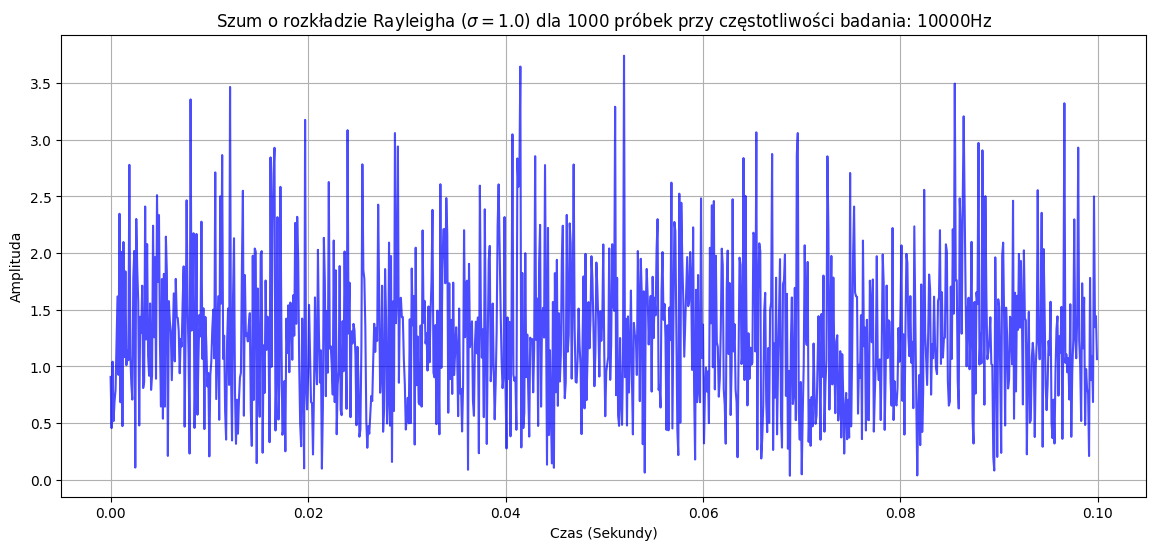

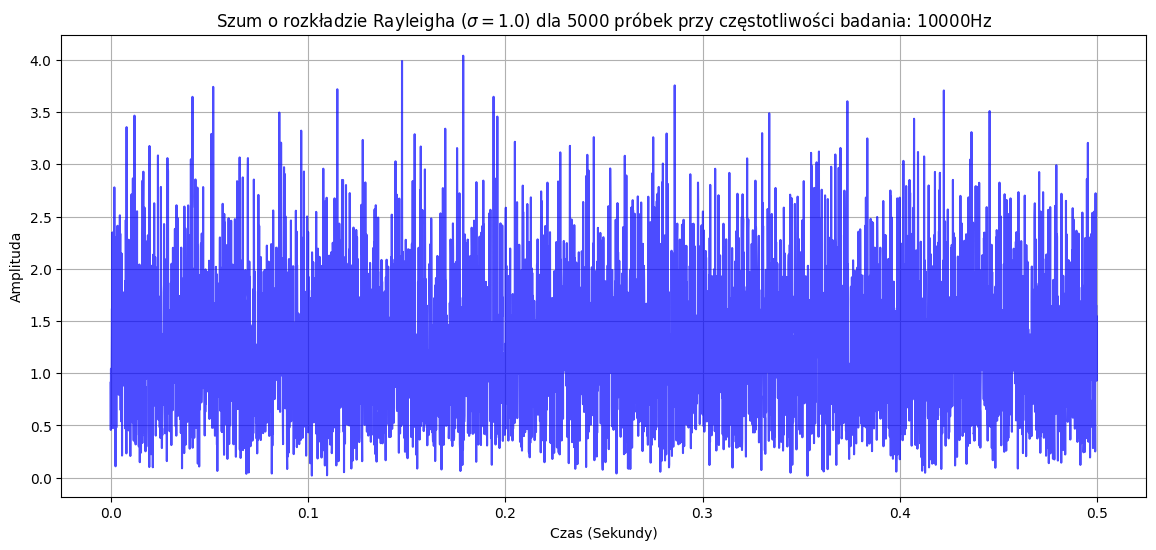

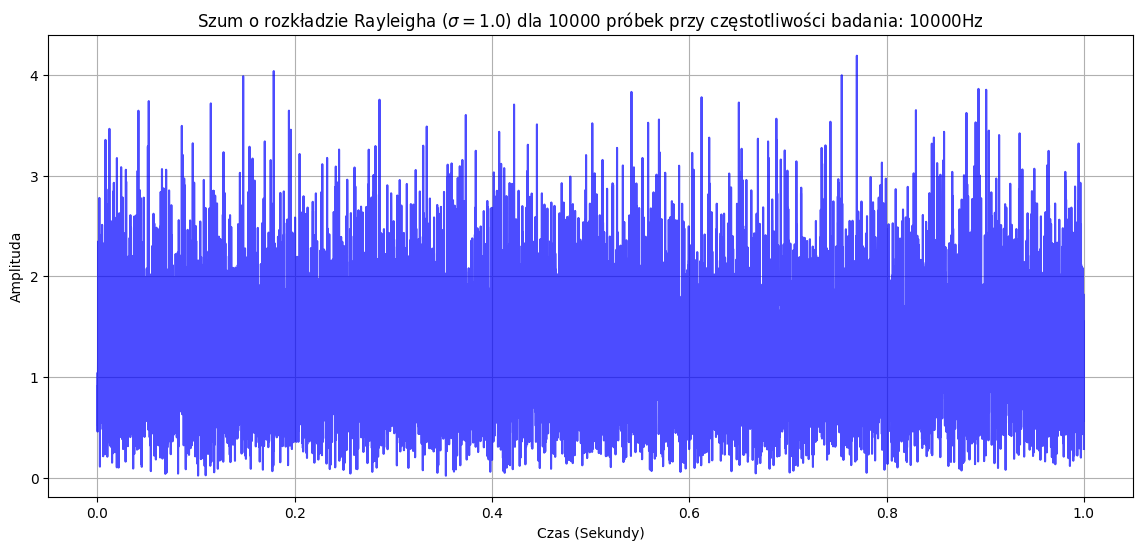

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Set Random seed
np.random.seed(69420)

# Parametry symulacji
sigma = 1.0             
sampling_freq = 10000  # Częstotliwość próbkowania w Hz
# 10, 100, 500, 20000
sample_sizes = [1000, 5000, 10000] # Liczba różnych próbek

num_samples = max(sample_sizes) # Liczba wszystkich próbek
duration = num_samples/sampling_freq

# Generowanie szumu Rayleigha
rayleigh_noise = np.random.rayleigh(scale=sigma, size=num_samples)

# Wizualizacja szumu
for samples in sample_sizes:
    x_time = np.array([x/num_samples * duration for x in range(samples)])
    plt.figure(figsize=(14, 6))
    plt.plot(x_time, rayleigh_noise[:samples], color="blue", alpha=0.7)
    plt.title(f"Szum o rozkładzie Rayleigha ($\\sigma=1.0$) dla {samples} próbek przy częstotliwości badania: {sampling_freq}Hz")
    plt.xlabel("Czas (Sekundy)", )
    plt.ylabel("Amplituda")
    plt.grid(True)
    plt.show()

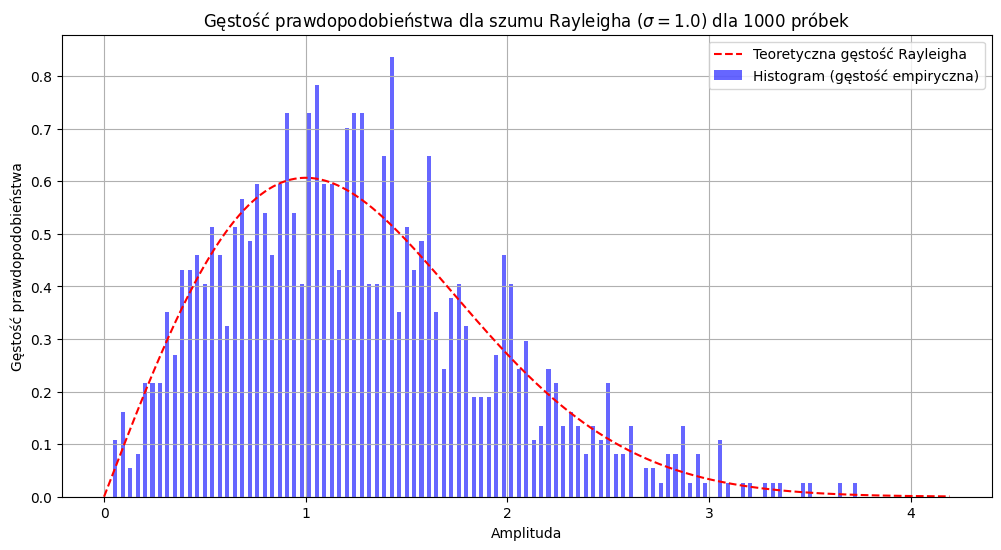

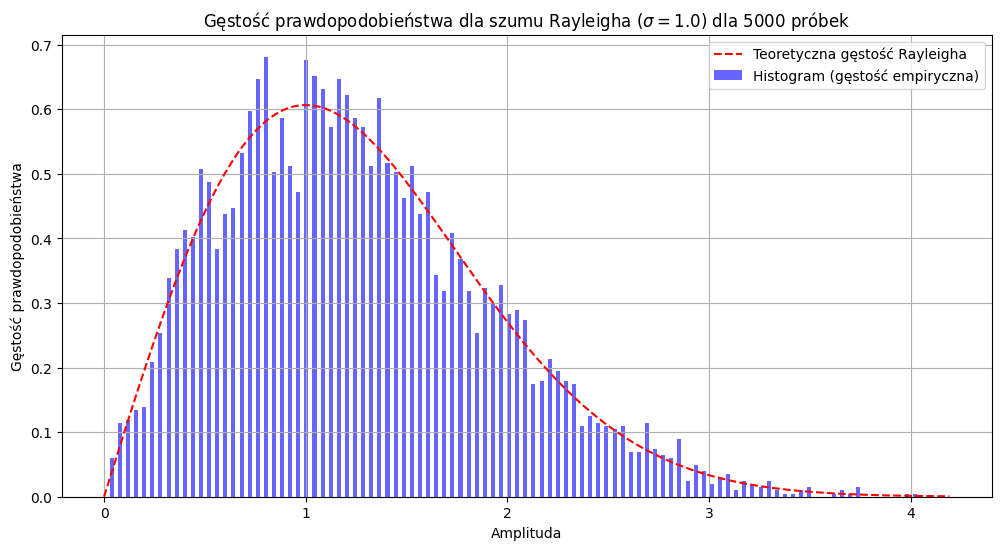

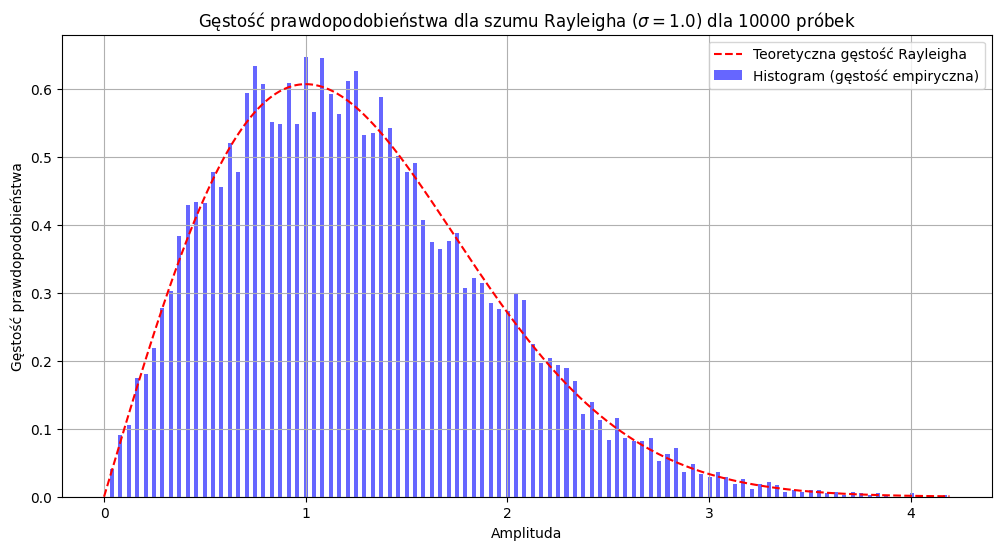

In [4]:


# Obliczanie gęstości prawdopodobieństwa (PDF) dla wygenerowanego szumu Rayleigha
pdf_values = []
bins = []
bin_centers = []

x = []
rayleigh_pdf = []

for i in range(len(sample_sizes)):
    pdf_values_d, bins_d = np.histogram(rayleigh_noise[:sample_sizes[i]], bins=100, density=True)
    bin_centers_d = (bins_d[:-1] + bins_d[1:]) / 2  # Środkowe wartości przedziałów
    pdf_values.append(pdf_values_d)
    bins.append(bins_d)
    bin_centers.append(bin_centers_d)

    # Wzorcowa funkcja gęstości prawdopodobieństwa rozkładu Rayleigha dla porównania
    x.append(np.linspace(0, max(rayleigh_noise), sample_sizes[i]))
    rayleigh_pdf.append(stats.rayleigh.pdf(x[i], scale=sigma))

    # Rysowanie histogramu i PDF
    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers[i], pdf_values[i], label="Histogram (gęstość empiryczna)", color="blue", width=0.02, alpha=0.6, )
    plt.plot(x[i], rayleigh_pdf[i], label="Teoretyczna gęstość Rayleigha", color="red", linestyle="--")
    plt.title(f"Gęstość prawdopodobieństwa dla szumu Rayleigha ($\\sigma=1.0$) dla {sample_sizes[i]} próbek")
    plt.xlabel("Amplituda")
    plt.ylabel("Gęstość prawdopodobieństwa")
    plt.legend()
    plt.grid(True)
    plt.show()

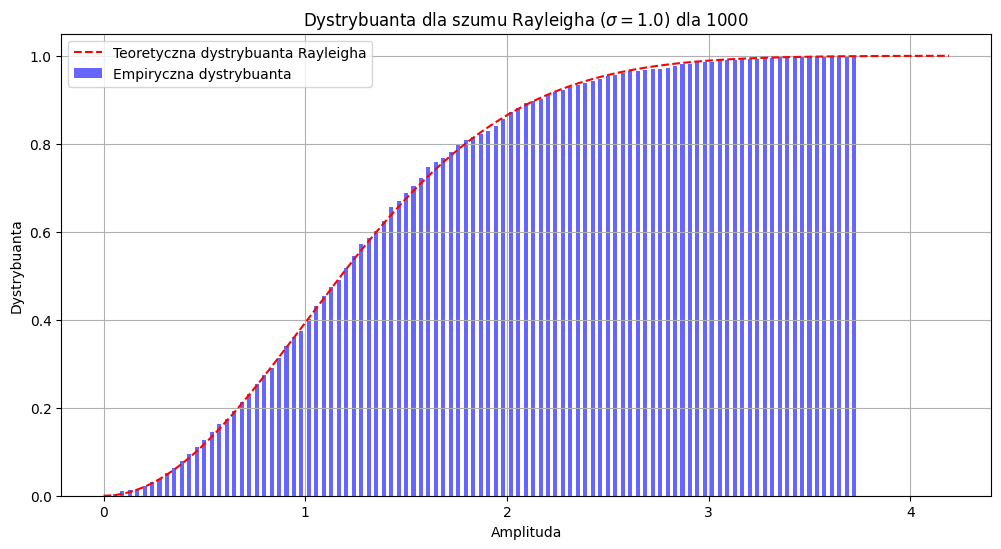

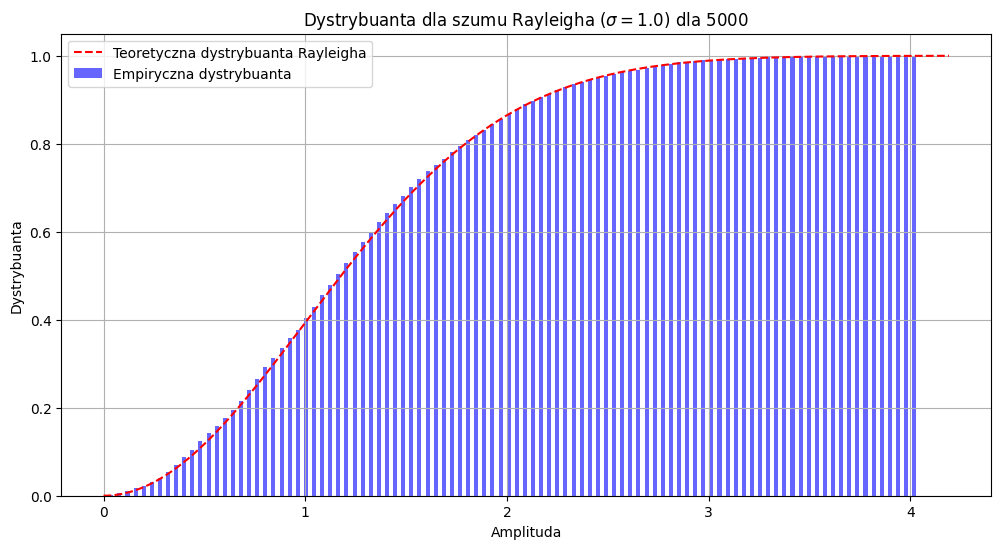

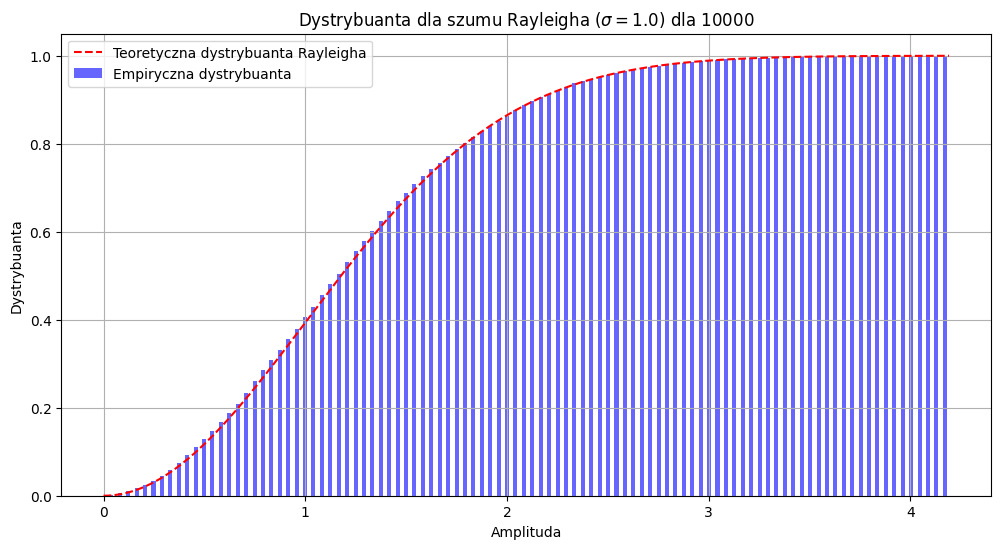

In [5]:
# Obliczanie dystrybuanty (CDF) dla rozkładu Rayleigha na podstawie wygenerowanego szumu
rayleigh_cdf_empirical = []

for i in range(len(sample_sizes)):
    rayleigh_cdf_empirical.append(np.cumsum(pdf_values[i] * np.diff(bins[i])))  # Numeryczna aproksymacja CDF z histogramu

    # Teoretyczna dystrybuanta rozkładu Rayleigha
    rayleigh_cdf_theoretical = stats.rayleigh.cdf(x[i], scale=sigma)

    # Rysowanie dystrybuanty
    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers[i], rayleigh_cdf_empirical[i], label="Empiryczna dystrybuanta", color="blue", width=0.02, alpha=0.6)
    plt.plot(x[i], rayleigh_cdf_theoretical, label="Teoretyczna dystrybuanta Rayleigha", color="red", linestyle="--")
    plt.title(f"Dystrybuanta dla szumu Rayleigha ($\\sigma=1.0$) dla {sample_sizes[i]}")
    plt.xlabel("Amplituda")
    plt.ylabel("Dystrybuanta")
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
statistic_tables = []
summary_table = pd.DataFrame(sample_sizes, columns=["Sample Size"])
rayleigh_noise_means = []
rayleigh_noise_wariants = []
rayleigh_noise_st_dev = []
for i in range(len(sample_sizes)):
    table = pd.DataFrame(rayleigh_noise[:sample_sizes[i]], columns = ['x'])

    rayleigh_noise_means.append(rayleigh_noise[:sample_sizes[i]].mean())

    table['x - xsr'] = table['x'] - rayleigh_noise_means[i]
    table['(x - xsr)^2'] = table['x - xsr']**2

    rayleigh_noise_wariants.append((table['(x - xsr)^2'].sum())/(len(rayleigh_noise[:sample_sizes[i]])-1))
    rayleigh_noise_st_dev.append(rayleigh_noise_wariants[i]**(1/2))

    statistic_tables.append(table)

summary_table['Mean/Expected Value'] = rayleigh_noise_means
summary_table['Wariant'] = rayleigh_noise_wariants
summary_table['Standard Deviation'] = rayleigh_noise_st_dev
summary_table
#


,Sample Size,Mean/Expected Value,Wariant,Standard Deviation
0,1000,1.266435,0.441470,0.664432
1,5000,1.254259,0.435264,0.659745
2,10000,1.255538,0.436603,0.660759


In [ ]:
# kowariancja
P_sums = []
for table in statistic_tables:
    samples = len(table)
    j_sums = []
    for j in range (100):
        samples_n_cov = samples - j
        table[f"j{j}"] = 0.0
        
        for i, row in table.iterrows():
            if i >= samples_n_cov:
                break
            table.loc[i, f"j{j}"] = table["x - xsr"][i] * table["x - xsr"][i+j]
            #table[f"j{j}"][i] = table["x - xsr"][i]
            #print(row[f"j{j}"])
        j_sums.append(table[f"j{j}"].sum() / samples_n_cov)
    P_sums.append(j_sums)

statistic_tables[0]


Table


C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[f"j{j}"] = 0.0
C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[f"j{j}"] = 0.0
C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Table


C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[f"j{j}"] = 0.0
C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[f"j{j}"] = 0.0
C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Table


C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[f"j{j}"] = 0.0
C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[f"j{j}"] = 0.0
C:\Users\slawe\AppData\Local\Temp\ipykernel_4376\2619925664.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

,x,x - xsr,(x - xsr)^2,j0,j1,j2,j3,j4,j5,j6,...,j90,j91,j92,j93,j94,j95,j96,j97,j98,j99
0,0.908234,-0.358200,0.128308,0.128308,0.290111,0.080238,0.267961,0.206073,0.170400,0.016158,...,-0.067710,0.000384,-0.362214,0.071755,-0.088579,0.293186,-0.061158,0.030951,0.158401,0.116123
1,0.456522,-0.809913,0.655959,0.655959,0.181423,0.605876,0.465944,0.385284,0.036534,-0.284640,...,0.000869,-0.818989,0.162243,-0.200282,0.662910,-0.138281,0.069982,0.358154,0.262562,0.858076
2,1.042431,-0.224003,0.050178,0.050178,0.167571,0.128869,0.106561,0.010105,-0.078725,0.076251,...,-0.226514,0.044873,-0.055394,0.183346,-0.038245,0.019355,0.099057,0.072619,0.237324,0.077465
3,0.518360,-0.748075,0.559616,0.559616,0.430368,0.355867,0.033745,-0.262908,0.254645,-0.808665,...,0.149855,-0.184991,0.612297,-0.127723,0.064639,0.330809,0.242515,0.792561,0.258699,0.165631
4,0.691134,-0.575301,0.330971,0.330971,0.273677,0.025951,-0.202187,0.195832,-0.621897,0.334905,...,-0.142265,0.470882,-0.098224,0.049710,0.254406,0.186504,0.609513,0.198950,0.127377,-0.037680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.686566,-0.579869,0.336248,0.336248,-0.715502,-0.046674,-0.103227,0.116884,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,2.500338,1.233904,1.522518,1.522518,0.099318,0.219656,-0.248717,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
997,1.346926,0.080491,0.006479,0.006479,0.014329,-0.016224,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,1.444452,0.178017,0.031690,0.031690,-0.035883,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


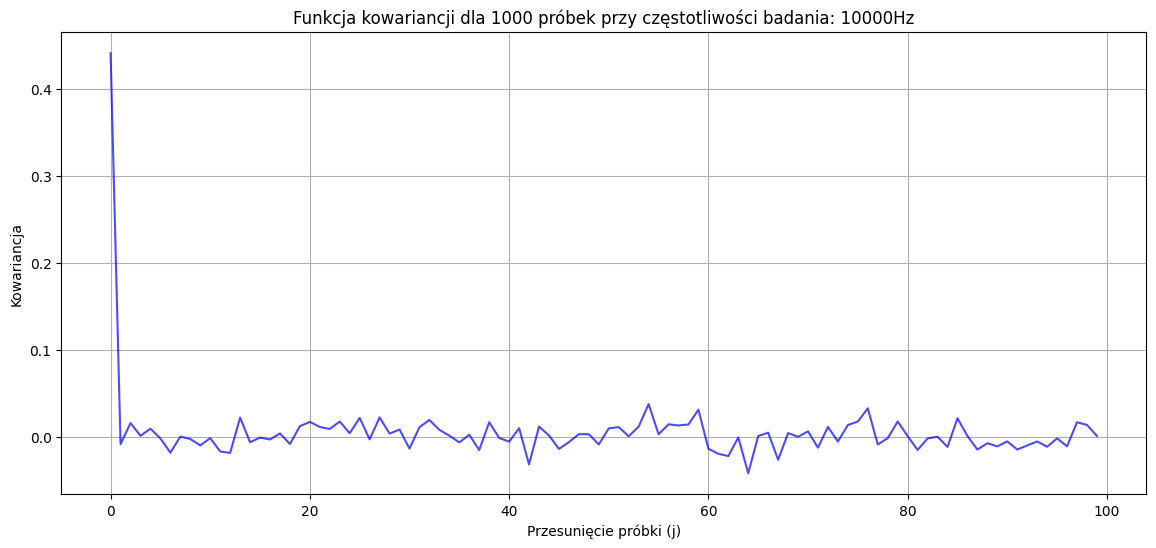

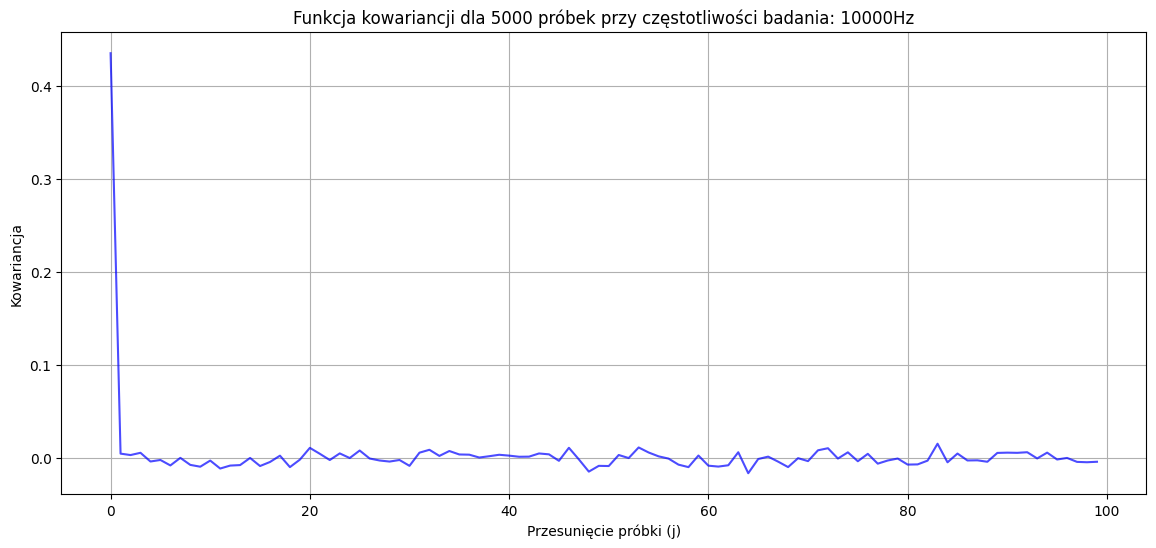

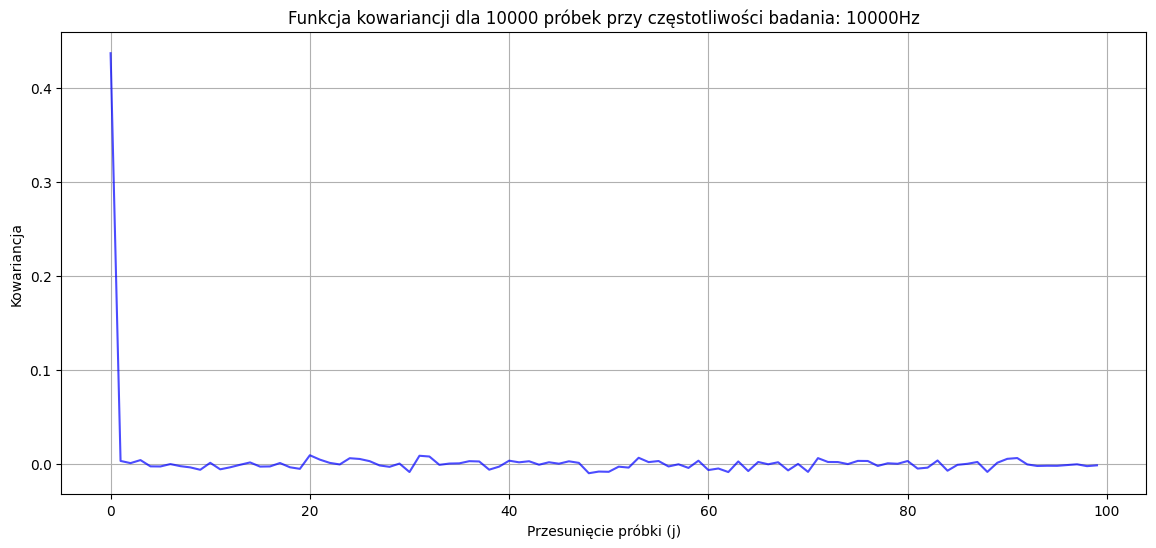

In [8]:
P_sums_table = pd.DataFrame(P_sums)
P_sums_table = P_sums_table.transpose()

for col in P_sums_table.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(P_sums_table[col], color="blue", alpha=0.7)
    plt.title(f"Funkcja kowariancji dla {sample_sizes[col]} próbek przy częstotliwości badania: {sampling_freq}Hz")
    plt.xlabel("Przesunięcie próbki (j)", )
    plt.ylabel("Kowariancja")
    plt.grid(True)
    plt.show()


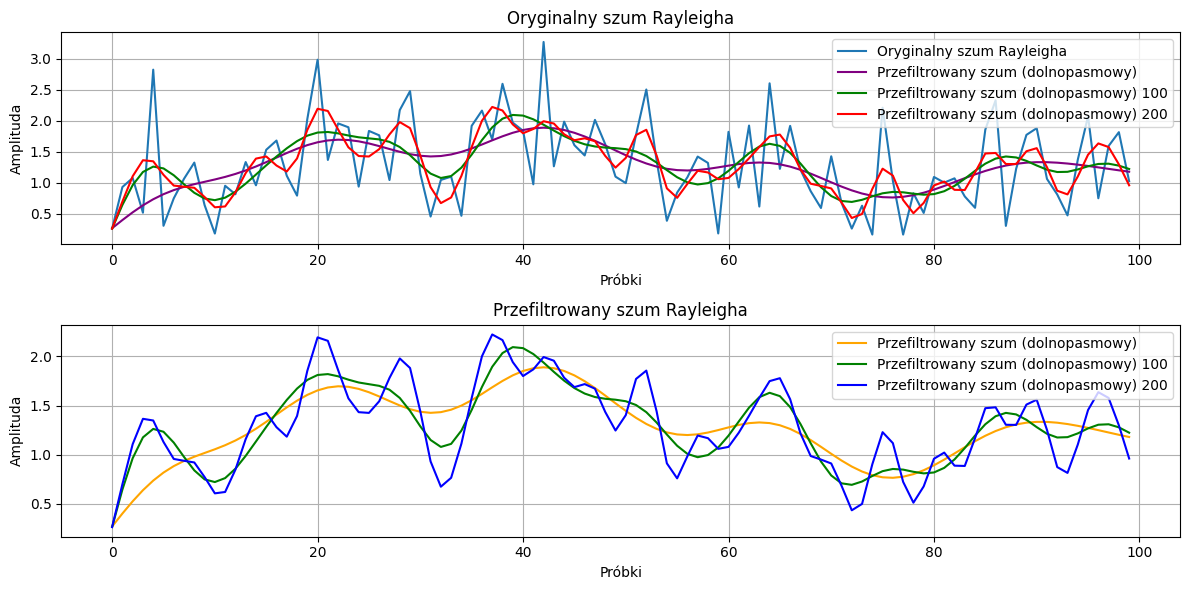

In [21]:
# Filtracja Dolna:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parametry rozkładu Rayleigha
sigma = 1.0  # parametr skali
N = 1000  # liczba próbek

# Generowanie szumu z rozkładu Rayleigha
rayleigh_noise = np.random.rayleigh(sigma, N)

# Parametry filtru dolnopasmowego
fs = 1000  # częstotliwość próbkowania [Hz]
fc = 50    # częstotliwość odcięcia [Hz]
b, a = signal.butter(4, fc / (fs / 2), btype='low')  # Filtr Butterwortha, 4 rzędu

# Filtracja dolnopasmowa
filtered_noise = signal.filtfilt(b, a, rayleigh_noise)

# Parametry filtru dolnopasmowego
fs = 1000  # częstotliwość próbkowania [Hz]
fc = 100   # częstotliwość odcięcia [Hz]
b, a = signal.butter(4, fc / (fs / 2), btype='low')  # Filtr Butterwortha, 4 rzędu

# Filtracja dolnopasmowa
filtered_noise_1 = signal.filtfilt(b, a, rayleigh_noise)

# Parametry filtru dolnopasmowego
fs = 1000  # częstotliwość próbkowania [Hz]
fc = 200     # częstotliwość odcięcia [Hz]
b, a = signal.butter(4, fc / (fs / 2), btype='low')  # Filtr Butterwortha, 4 rzędu

# Filtracja dolnopasmowa
filtered_noise_2 = signal.filtfilt(b, a, rayleigh_noise)

# Wizualizacja
plt.figure(figsize=(12, 6))

# Sygnał pierwotny
plt.subplot(2, 1, 1)
plt.plot(rayleigh_noise[:100], label="Oryginalny szum Rayleigha")
plt.plot(filtered_noise[:100], color='purple', label="Przefiltrowany szum (dolnopasmowy)")
plt.plot(filtered_noise_1[:100], color='green', label="Przefiltrowany szum (dolnopasmowy) 100")
plt.plot(filtered_noise_2[:100], color='red', label="Przefiltrowany szum (dolnopasmowy) 200")
plt.title("Oryginalny szum Rayleigha")
plt.xlabel("Próbki")
plt.ylabel("Amplituda")
plt.legend()
plt.grid()

# Sygnał przefiltrowany
plt.subplot(2, 1, 2)
plt.plot(filtered_noise[:100], color='orange', label="Przefiltrowany szum (dolnopasmowy)")
plt.plot(filtered_noise_1[:100], color='green', label="Przefiltrowany szum (dolnopasmowy) 100")
plt.plot(filtered_noise_2[:100], color='blue', label="Przefiltrowany szum (dolnopasmowy) 200")
plt.title("Przefiltrowany szum Rayleigha")
plt.xlabel("Próbki")
plt.ylabel("Amplituda")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [15]:
from pprint import pprint

pprint(rayleigh_noise[:10])
pprint(filtered_noise[:10])


array([1.57116081, 1.59380477, 1.61632161, 1.63874438, 1.66105465,
       1.68309631, 1.70449976, 1.72461302, 1.74245049, 1.75668125])
array([1.58461182, 0.0429507 , 1.82510717, 1.81823586, 1.86428982,
       2.3520594 , 0.98730371, 1.98390506, 1.38652843, 1.55737186])


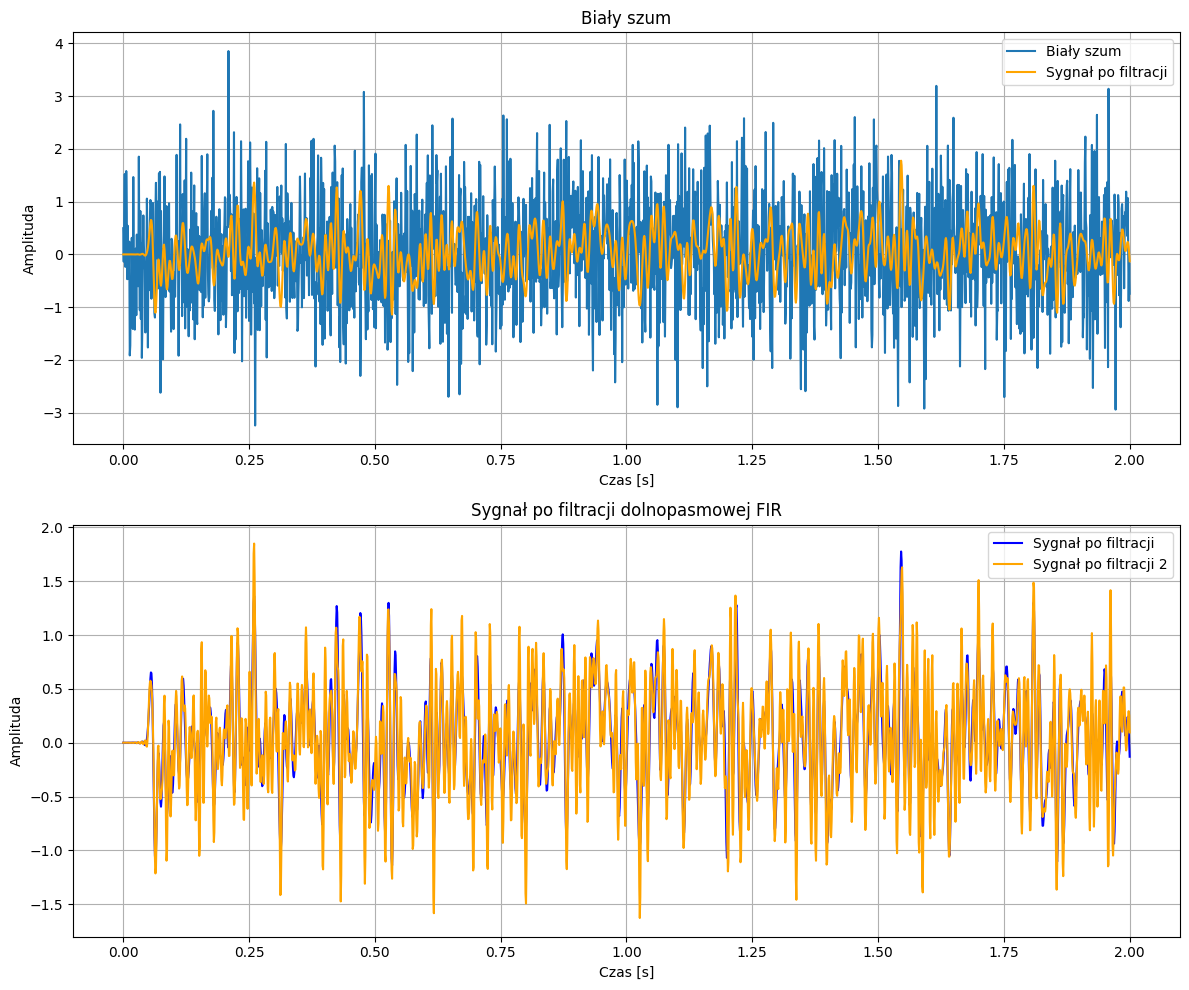

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Parametry sygnału
fs = 1000  # Częstotliwość próbkowania (Hz)
duration = 2  # Długość sygnału (s)
num_samples = fs * duration

# Generowanie białego szumu
np.random.seed(42)  # Dla powtarzalności wyników
white_noise = np.random.normal(0, 1, num_samples)

# Parametry filtru FIR
tap_count = 101  # Liczba współczynników filtru (taps)
cutoff_freq = 100  # Częstotliwość odcięcia (Hz)

# Projektowanie filtru FIR
taps = firwin(tap_count, cutoff_freq, fs=fs, pass_zero="lowpass")

# Filtracja sygnału
filtered_signal = lfilter(taps, 1.0, white_noise)

# Parametry filtru FIR
tap_count = 101  # Liczba współczynników filtru (taps)
cutoff_freq = 150  # Częstotliwość odcięcia (Hz)

# Projektowanie filtru FIR
taps = firwin(tap_count, cutoff_freq, fs=fs, pass_zero="lowpass")

# Filtracja sygnału
filtered_signal_2 = lfilter(taps, 1.0, white_noise)

# Parametry filtru FIR
tap_count = 101  # Liczba współczynników filtru (taps)
cutoff_freq = 200  # Częstotliwość odcięcia (Hz)

# Projektowanie filtru FIR
taps = firwin(tap_count, cutoff_freq, fs=fs, pass_zero="lowpass")

# Filtracja sygnału
filtered_signal_3 = lfilter(taps, 1.0, white_noise)


# Wizualizacja
plt.figure(figsize=(12, 10))

# Biały szum
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, duration, num_samples), white_noise, label="Biały szum")
plt.plot(np.linspace(0, duration, num_samples), filtered_signal, label="Sygnał po filtracji", color="orange")
plt.title("Biały szum")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.legend()

# Sygnał po filtracji
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, duration, num_samples), filtered_signal, label="Sygnał po filtracji", color="blue")
plt.plot(np.linspace(0, duration, num_samples), filtered_signal_2, label="Sygnał po filtracji 2", color="orange")
#plt.plot(np.linspace(0, duration, num_samples), filtered_signal_3, label="Sygnał po filtracji 3", color="green")
plt.title("Sygnał po filtracji dolnopasmowej FIR")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


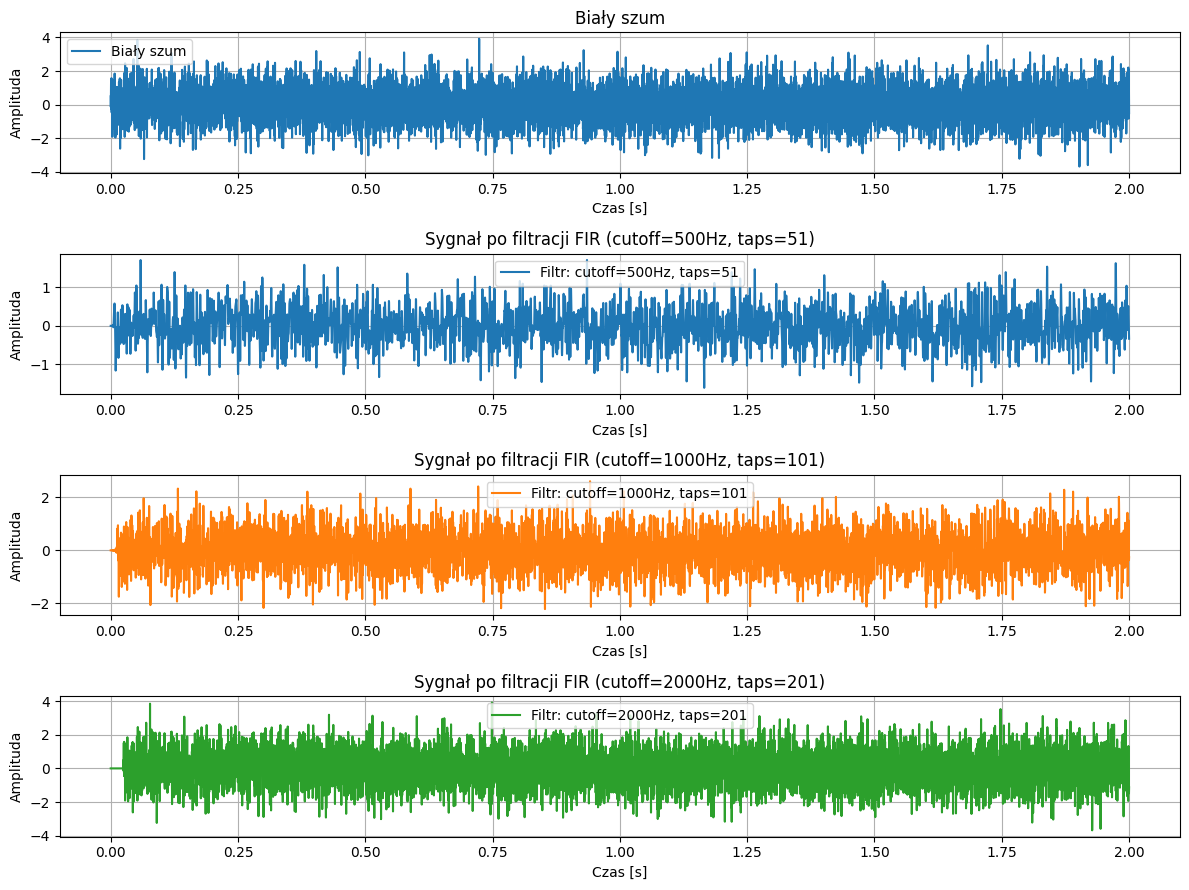

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Parametry sygnału
fs = 4001  # Częstotliwość próbkowania (Hz)
duration = 2  # Długość sygnału (s)
num_samples = fs * duration

# Generowanie białego szumu
np.random.seed(42)  # Dla powtarzalności wyników
white_noise = np.random.normal(0, 1, num_samples)

# Funkcja do projektowania i stosowania filtru FIR
def apply_fir_filter(noise, cutoff_freq, tap_count, fs):
    taps = firwin(tap_count, cutoff_freq, fs=fs, pass_zero="lowpass")
    filtered_signal = lfilter(taps, 1.0, noise)
    return filtered_signal, taps

# Definicje różnych szerokości filtru
filters = [
    {"cutoff_freq": 500, "tap_count": 51},
    {"cutoff_freq": 1000, "tap_count": 101},
    {"cutoff_freq": 2000, "tap_count": 201}
]

# Filtracja sygnału z różnymi filtrami
filtered_signals = []
for filt in filters:
    filtered_signal, taps = apply_fir_filter(white_noise, filt["cutoff_freq"], filt["tap_count"], fs)
    filtered_signals.append((filtered_signal, filt))

# Wizualizacja
plt.figure(figsize=(12, 9))

# Biały szum
plt.subplot(len(filters) + 1, 1, 1)
plt.plot(np.linspace(0, duration, num_samples), white_noise, label="Biały szum")
plt.title("Biały szum")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.legend()

# Sygnały po filtracji z różnymi szerokościami filtru
for i, (filtered_signal, filt) in enumerate(filtered_signals):
    plt.subplot(len(filters) + 1, 1, i + 2)
    plt.plot(np.linspace(0, duration, num_samples), filtered_signal, 
             label=f"Filtr: cutoff={filt['cutoff_freq']}Hz, taps={filt['tap_count']}", color=f"C{i}")
    plt.title(f"Sygnał po filtracji FIR (cutoff={filt['cutoff_freq']}Hz, taps={filt['tap_count']})")
    plt.xlabel("Czas [s]")
    plt.ylabel("Amplituda")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()
